In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "center")
pd.set_option("display.precision", 3)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

POS_INF_REPLACE = 0.0

def final_score(completness, acc_5, acc_10, acc_20):
    # official score used for final evaluation
    # input values in range [0, 1] not percentage
    return (1 - np.exp(-4 * completness)) * (0.5 * acc_5 + 0.35 * acc_10 + 0.15 * acc_20)

In [9]:
dir_results_parent = Path("experiments")

##################### Manual Select ###################################
dir_results_candidates = [
    dir_results_parent / "test_stacked_pred_optimal_extrem_pred", 
    dir_results_parent / "overwrite_init_cam_distr/argmin/test_full_optimal_extrem_pred",
    dir_results_parent / "test_center_pred_optimal_extrem_pred",
    dir_results_parent / "overwrite_init_cam_distr/argmin/test_full_optimal_extrem_gt",
]
filter_dirs = ["test_", "stacked", "argmin"]

run_rename = {
    'argmin/test_full_optimal_extrem_gt': "argmin GT", 
    'argmin/test_full_optimal_extrem_pred': "argmin SNBaseline*", 
    'experiments/test_stacked_pred_optimal_extrem_pred': "stacked SNBaseline*", 
}

print(dir_results_candidates)
dir_plot_results = dir_results_parent / f"plots__{'___'.join([d.replace('*', 'star') for d in filter_dirs])}"
print(dir_plot_results)

# read individual results
dfs = []
for result_dir in dir_results_candidates:
    file_summary = result_dir / "df_summary_full.json"
    if not file_summary.exists():
        print(f"Warning: {file_summary} does not exists... continue")
        continue
    df = pd.read_json(file_summary, orient="records", lines=True)
    df["run"] = result_dir.parent.name + "/" + result_dir.name
    dfs.append(df)

df = pd.concat(dfs)
df.sort_values(["run", "tau", "threshold"], ascending=False, inplace=True)
df.reset_index(inplace=True, drop=True)
df.replace([np.NaN], np.inf, inplace=True)

print(df["run"].unique().tolist())

# df["completeness rate"] = df["completeness rate"].apply(lambda s: float(s.split(" (")[0]))
# df["total completeness rate"] = df["total completeness rate"].apply(lambda s: float(s.split(" (")[0]))
df

[PosixPath('experiments/test_stacked_pred_optimal_extrem_pred'), PosixPath('experiments/overwrite_init_cam_distr/argmin/test_full_optimal_extrem_pred'), PosixPath('experiments/test_center_pred_optimal_extrem_pred'), PosixPath('experiments/overwrite_init_cam_distr/argmin/test_full_optimal_extrem_gt')]
experiments/plots__test____stacked___argmin
['experiments/test_stacked_pred_optimal_extrem_pred', 'argmin/test_full_optimal_extrem_pred', 'argmin/test_full_optimal_extrem_gt']


,tau,threshold,completeness (subset),completeness,meanRecall,meanPrecision,meanAccuracies,Big rect. right topPrecision,Big rect. right topRecall,Big rect. right topAccuracy,Big rect. right bottomPrecision,Big rect. right bottomRecall,Big rect. right bottomAccuracy,Small rect. right mainPrecision,Small rect. right mainRecall,Small rect. right mainAccuracy,Side line bottomPrecision,Side line bottomRecall,Side line bottomAccuracy,Goal right post leftPrecision,Goal right post leftRecall,Goal right post leftAccuracy,Goal right post rightPrecision,Goal right post rightRecall,Goal right post rightAccuracy,Big rect. right mainPrecision,Big rect. right mainRecall,Big rect. right mainAccuracy,Small rect. right bottomPrecision,Small rect. right bottomRecall,Small rect. right bottomAccuracy,Small rect. right topPrecision,Small rect. right topRecall,Small rect. right topAccuracy,Goal right crossbarPrecision,Goal right crossbarRecall,Goal right crossbarAccuracy,Side line rightPrecision,Side line rightRecall,Side line rightAccuracy,Side line topPrecision,Side line topRecall,Side line topAccuracy,Circle rightPrecision,Circle rightRecall,Circle rightAccuracy,Side line leftPrecision,Side line leftRecall,Side line leftAccuracy,Big rect. left bottomPrecision,Big rect. left bottomRecall,Big rect. left bottomAccuracy,Small rect. left topPrecision,Small rect. left topRecall,Small rect. left topAccuracy,Goal left crossbarPrecision,Goal left crossbarRecall,Goal left crossbarAccuracy,Small rect. left bottomPrecision,Small rect. left bottomRecall,Small rect. left bottomAccuracy,Goal left post left Precision,Goal left post left Recall,Goal left post left Accuracy,Goal left post rightPrecision,Goal left post rightRecall,Goal left post rightAccuracy,Big rect. left mainPrecision,Big rect. left mainRecall,Big rect. left mainAccuracy,Big rect. left topPrecision,Big rect. left topRecall,Big rect. left topAccuracy,Small rect. left mainPrecision,Small rect. left mainRecall,Small rect. left mainAccuracy,Circle leftPrecision,Circle leftRecall,Circle leftAccuracy,Middle linePrecision,Middle lineRecall,Middle lineAccuracy,Circle centralPrecision,Circle centralRecall,Circle centralAccuracy,run
0,0.025,20,0.919280205655527 (1788/1945),0.658,0.998,0.932,0.931,0.951,0.998,0.949,0.936,0.995,0.932,0.978,1.000,0.978,0.825,1.000,0.825,0.979,0.999,0.978,0.976,0.998,0.974,0.930,0.999,0.929,0.970,0.989,0.959,0.970,0.995,0.966,0.982,0.999,0.981,0.909,0.999,0.908,0.936,1.000,0.936,0.976,0.999,0.976,0.930,1.000,0.930,0.944,0.991,0.935,0.981,0.999,0.980,0.987,0.994,0.981,0.973,0.992,0.966,0.981,0.995,0.976,0.987,1.000,0.987,0.948,1.000,0.948,0.953,0.996,0.950,0.987,1.000,0.987,0.963,1.000,0.963,0.887,1.0,0.887,0.957,1,0.957,experiments/test_stacked_pred_optimal_extrem_pred
1,0.025,10,0.919280205655527 (1788/1945),0.658,0.996,0.820,0.819,0.861,0.998,0.859,0.869,0.993,0.863,0.948,0.999,0.947,0.761,0.996,0.759,0.965,0.999,0.964,0.951,0.998,0.950,0.736,0.999,0.735,0.942,0.987,0.930,0.955,0.995,0.951,0.960,0.999,0.959,0.797,0.997,0.795,0.914,1.000,0.914,0.966,0.999,0.965,0.785,1.000,0.785,0.857,0.990,0.850,0.963,0.999,0.962,0.974,0.994,0.968,0.951,0.992,0.944,0.974,0.995,0.969,0.971,1.000,0.971,0.773,1.000,0.773,0.853,0.996,0.850,0.958,1.000,0.958,0.953,1.000,0.953,0.851,1.0,0.851,0.919,1,0.919,experiments/test_stacked_pred_optimal_extrem_pred
2,0.025,5,0.919280205655527 (1788/1945),0.658,0.991,0.576,0.575,0.741,0.996,0.739,0.726,0.981,0.716,0.825,0.994,0.821,0.659,0.965,0.644,0.829,0.997,0.827,0.743,0.996,0.740,0.482,0.986,0.479,0.846,0.980,0.832,0.858,0.993,0.853,0.765,0.993,0.761,0.657,0.988,0.652,0.769,0.999,0.769,0.913,0.993,0.908,0.627,0.995,0.625,0.693,0.980,0.683,0.867,0.994,0.862,0.823,0.993,0.818,0.847,0.988,0.838,0.855,0.993,0.849,0.808,0.998,0.807,0.526,0.991,0.523,0.740,0.994,0.737,0.835,0.997,0.833,0.874,0.994,0.869,0.674,1.0,0.674,0.786,1,0.786,experiments/test_stacked_pred_optimal_extrem_pred
3,0.020,20,0.8925449871465295 (1736/1945),0.638,0.998,0.936,0.934,0.954,0.998,

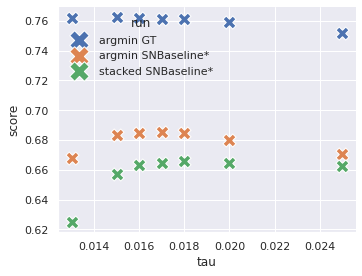

In [10]:
eval_completness_rate = "completeness" # "total completeness rate"
acc_mean = "meanAccuracies" # "accuracy mean"

df_summary_wide = df[["run", "tau", "threshold", eval_completness_rate, acc_mean]].pivot(
    index=["tau", "run", eval_completness_rate], columns="threshold"
)
df_summary_wide.columns = ['@'.join([str(x) for x in col]) for col in df_summary_wide.columns]
df_summary_wide.reset_index(drop=False, inplace=True)
df_summary_wide = df_summary_wide.replace([np.inf, float("inf")], POS_INF_REPLACE)
df_summary_wide["annotation"] = df_summary_wide["run"].apply(lambda s: "ground truth" if "extrem_gt" in s else "predicted")


df_summary_wide["run"] = df_summary_wide["run"].apply(lambda run: run_rename[run])


df_summary_wide["score"] = final_score(df_summary_wide[eval_completness_rate], df_summary_wide[f"{acc_mean}@5"], df_summary_wide[f"{acc_mean}@10"], df_summary_wide[f"{acc_mean}@20"])

markers = ["D" if "gt" in s else "X" for s in df_summary_wide["run"].unique()]
df_summary_wide.sort_values("score", ascending=False, inplace=True)


g = sns.FacetGrid(df_summary_wide, hue="run", height=4.0, sharey=True, aspect=1.3, hue_kws={"marker": markers}, legend_out=False) #  col="annotation"
g.map(sns.scatterplot, "tau", "score", legend="auto", s=170)# .set(xticks=df_summary_wide.tau.unique())
g.add_legend(markerscale=1.5, loc="upper left", frameon=False)
dir_plot_results.mkdir(exist_ok=True, parents=True)
g.savefig(dir_plot_results / "tau_vs_eval_score.svg")
g.savefig(dir_plot_results / "tau_vs_eval_score.pdf")

In [11]:
df_summary_wide.groupby("run").apply(pd.DataFrame.head, n=2)

tau          run           completeness  meanAccuracies@5  meanAccuracies@10  meanAccuracies@20   annotation   score
run                                                                                                                                          
argmin GT           3   0.015            argmin GT      0.688           0.720             0.892              0.949        ground truth  0.763
                    0   0.013            argmin GT      0.649           0.732             0.899              0.953        ground truth  0.762
argmin SNBaseline*  10  0.017   argmin SNBaseline*      0.690           0.598             0.837              0.930           predicted  0.685
                    7   0.016   argmin SNBaseline*      0.668           0.603             0.841              0.932           predicted  0.685
stacked SNBaseline* 14  0.018  stacked SNBaseline*      0.617           0.592             0.832              0.937           predicted  0.666
                    11  0.017  stacked SNBaseline*      0.605           0.595             0.834              0.938           predicted  0.665

In [12]:
df_summary_wide

,tau,run,completeness,meanAccuracies@5,meanAccuracies@10,meanAccuracies@20,annotation,score
3,0.015,argmin GT,0.688,0.720,0.892,0.949,ground truth,0.763
0,0.013,argmin GT,0.649,0.732,0.899,0.953,ground truth,0.762
6,0.016,argmin GT,0.704,0.715,0.889,0.947,ground truth,0.762
9,0.017,argmin GT,0.714,0.711,0.886,0.946,ground truth,0.761
12,0.018,argmin GT,0.722,0.709,0.885,0.946,ground truth,0.761
15,0.020,argmin GT,0.738,0.702,0.881,0.944,ground truth,0.759
18,0.025,argmin GT,0.763,0.689,0.869,0.937,ground truth,0.752
10,0.017,argmin SNBaseline*,0.690,0.598,0.837,0.930,predicted,0.685
7,0.016,argmin SNBaseline*,0.668,0.603,0.841,0.932,predicted,0.685
13,0.018,argmin SNBaseline*,0.702,0.594,0.835,0.929,predicted,0.685


['experiments/test_stacked_pred_optimal_extrem_pred'
 'argmin/test_full_optimal_extrem_pred'
 'argmin/test_full_optimal_extrem_gt']
['X', 'X', 'D']





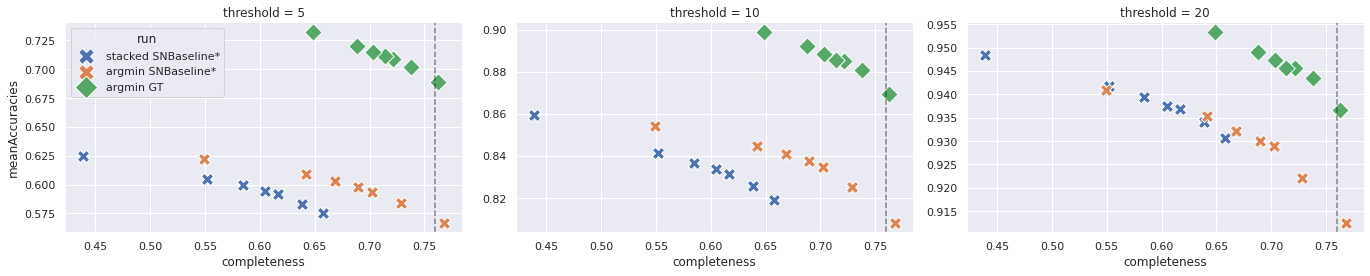

In [13]:

_markers = {"gt": "D", "non-gt": "X"}
print(df["run"].unique())
markers = [_markers["gt"] if ("extrem_gt" in s) else _markers["non-gt"] for s in df["run"].unique()]
print(markers)


df["run"] = df["run"].apply(lambda run: run_rename[run])

g = sns.FacetGrid(df, col="threshold", hue="run", height=4.0, sharey=False, legend_out=False, aspect=1.6, hue_kws={"marker": markers}) # .set(xlim=[0.5, 1.01])
g.map(sns.scatterplot, eval_completness_rate, acc_mean, s=150)
g.add_legend(markerscale=1.3)

for ax in g.axes.flat:
    print()
    ax.axvline(x=0.76, color="k", **{"alpha": 0.5, "linestyle": "--"}) # max expected completeness for main camera (center, left, right)
g.savefig(dir_plot_results / "tau_acc5-10-20_vs_completeness.svg")
g.savefig(dir_plot_results / "tau_acc5-10-20_vs_completeness.pdf")
